<a href="https://colab.research.google.com/github/hornetio/sales_prediction/blob/main/experiments/graphics_and_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
test_df=pd.read_csv('test.csv')
train_df=pd.read_csv('train.csv')
add_df=pd.read_csv('store.csv')

<ipython-input-5-18c1b6495887>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df=pd.read_csv('train.csv')


# Первичная обработка NaN

In [6]:
add_df.isna().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [7]:
add_df.loc[add_df['Promo2'] == 0, ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']] = 0

In [8]:
from random import randint

In [9]:
add_df['CompetitionDistance'].fillna(add_df['CompetitionDistance'].max()+randint(-200,200), inplace=True)
add_df['CompetitionOpenSinceMonth'].fillna(int(add_df['CompetitionOpenSinceMonth'].mean()+randint(-2,2)), inplace=True)
add_df['CompetitionOpenSinceYear'].fillna(int(add_df['CompetitionOpenSinceYear'].mean()+randint(-5,5)), inplace=True)

In [10]:
df = pd.merge(train_df, add_df, on='Store')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [13]:
df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [14]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.613123e+03,6.516267e+00,2.006881e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,8.499240e+03,2.847468e+00,5.613996e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,5.000000e+00,2.003000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,5.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.910000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.590200e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


# Фичи из даты

In [15]:
df = df[df['Open'] == 1]
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

# Продажи по времени

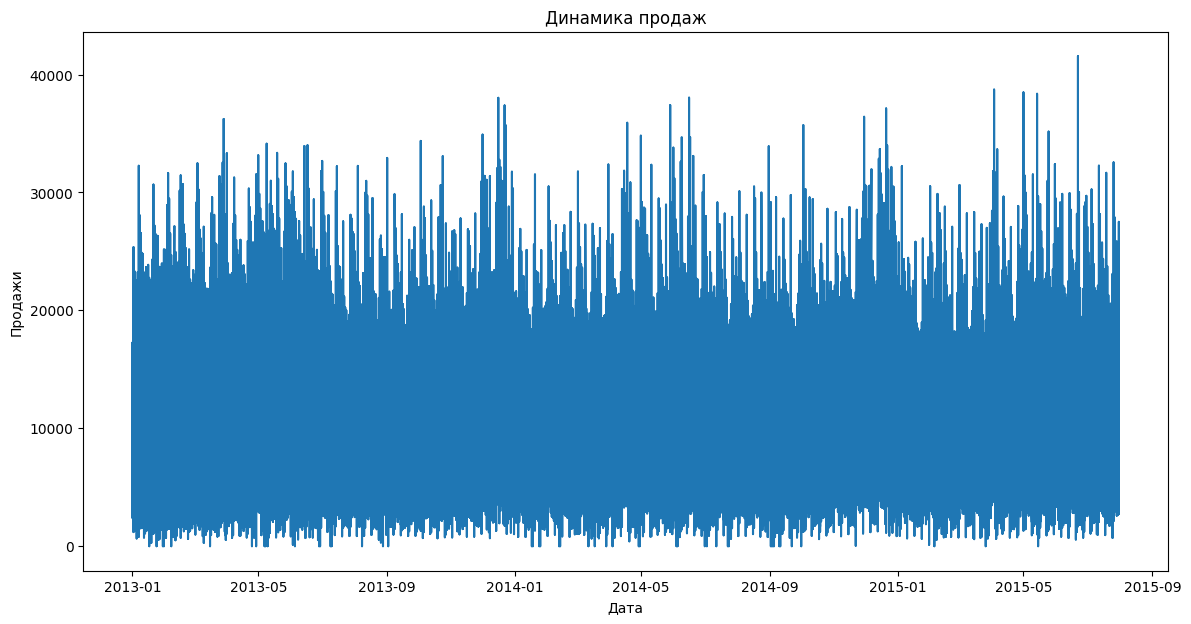

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Sales'])
plt.title('Динамика продаж')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

# Сезонность и тренды

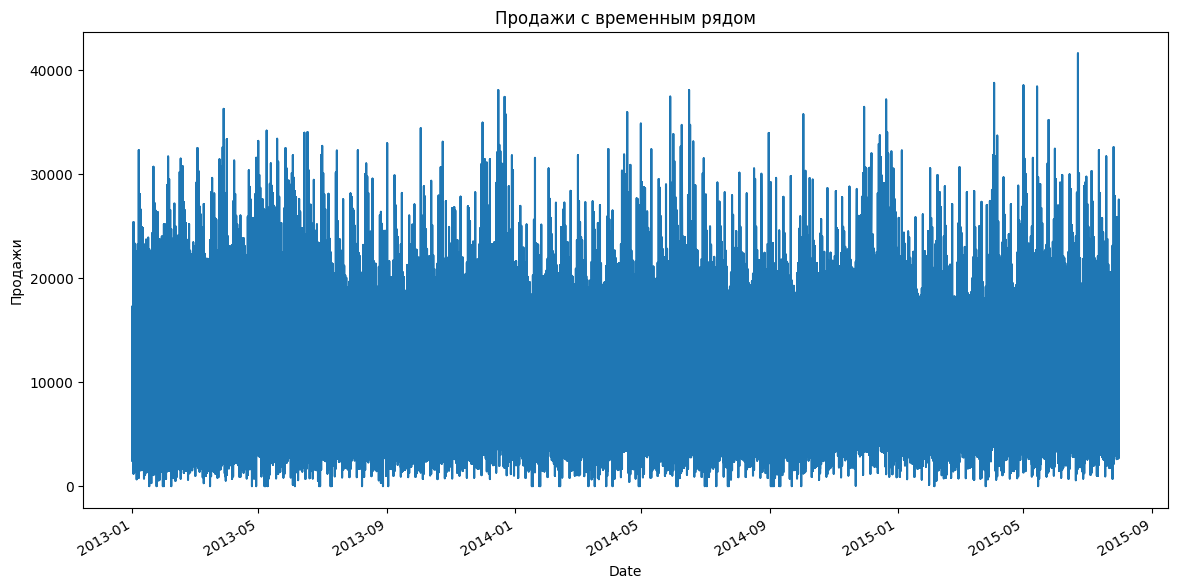

In [17]:
df.set_index('Date', inplace=True)
df['Sales'].plot(figsize=(14, 7), title='Продажи с временным рядом', ylabel='Продажи')
plt.show()

# Продажи в разные дни недели

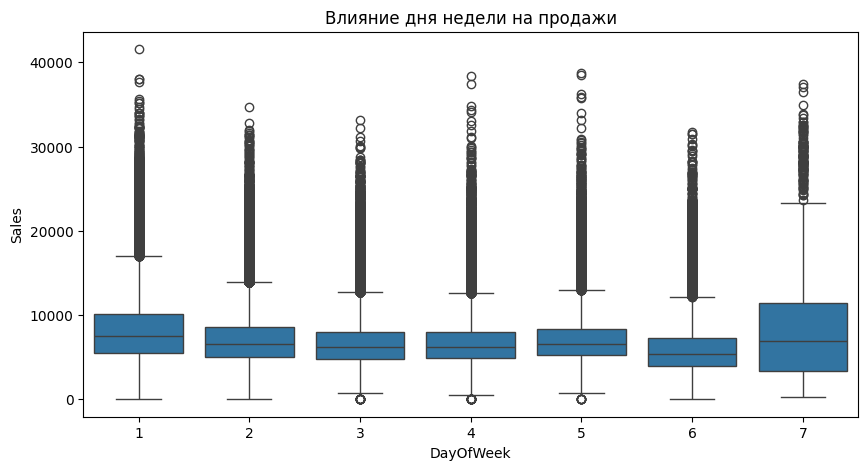

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='DayOfWeek', y='Sales', data=df)
plt.title('Влияние дня недели на продажи')
plt.show()

# Корреляция

In [20]:
df = pd.get_dummies(df, columns=['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], drop_first=True)


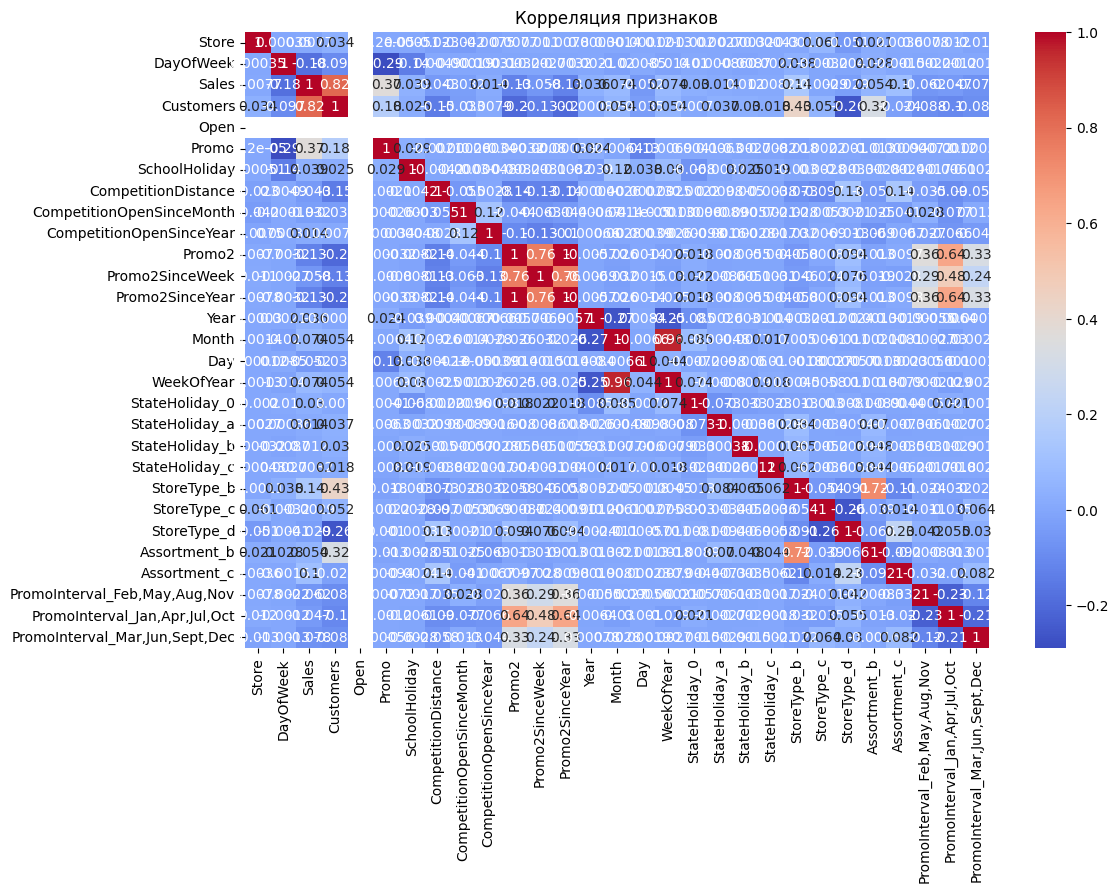

In [21]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция признаков')
plt.show()

# Промо акции

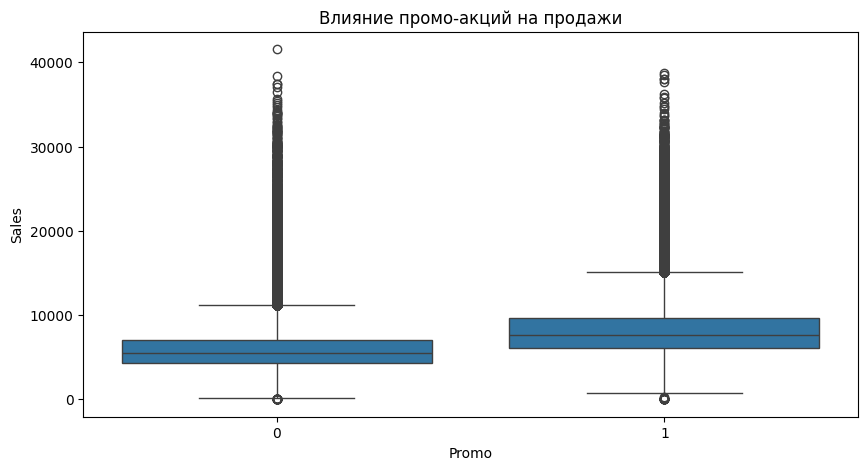

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Promo', y='Sales', data=df)
plt.title('Влияние промо-акций на продажи')
plt.show()

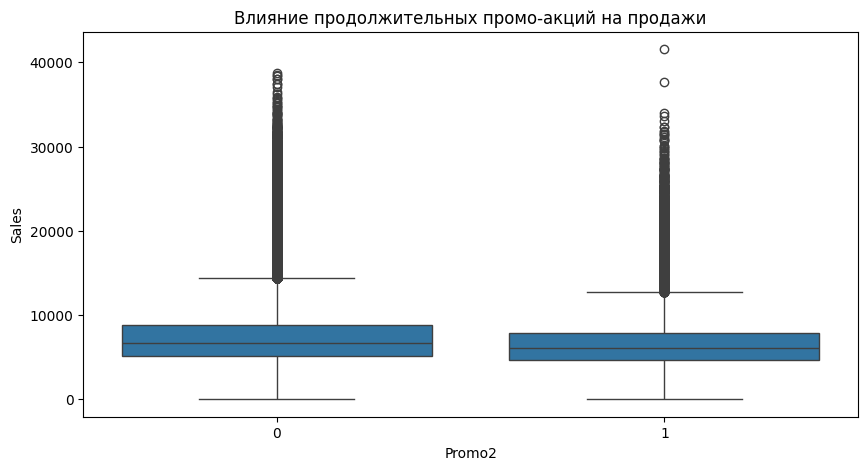

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Promo2', y='Sales', data=df)
plt.title('Влияние продолжительных промо-акций на продажи')
plt.show()

# Конкуренты

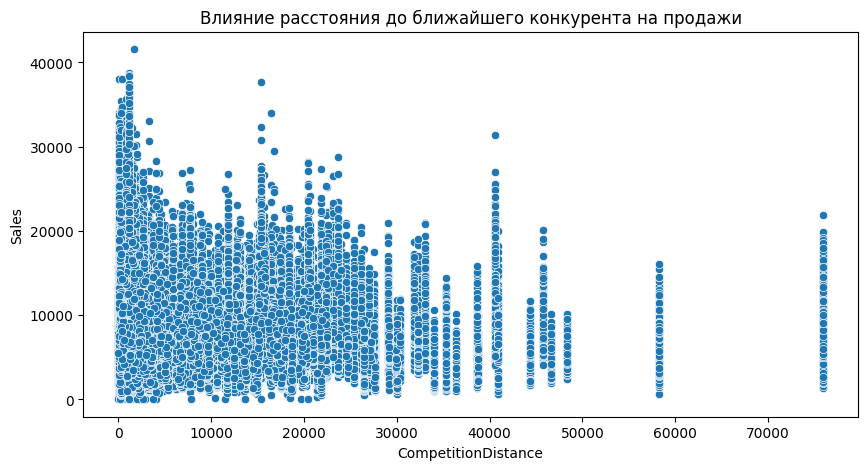

In [25]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=df)
plt.title('Влияние расстояния до ближайшего конкурента на продажи')
plt.show()

In [26]:
df['CompetitionOpenTimeMonths'] = 12 * (df['Year'] - df['CompetitionOpenSinceYear']) + (df['Month'] - df['CompetitionOpenSinceMonth'])
df['CompetitionOpenTimeMonths'] = df['CompetitionOpenTimeMonths'].apply(lambda x: x if x > 0 else 0)


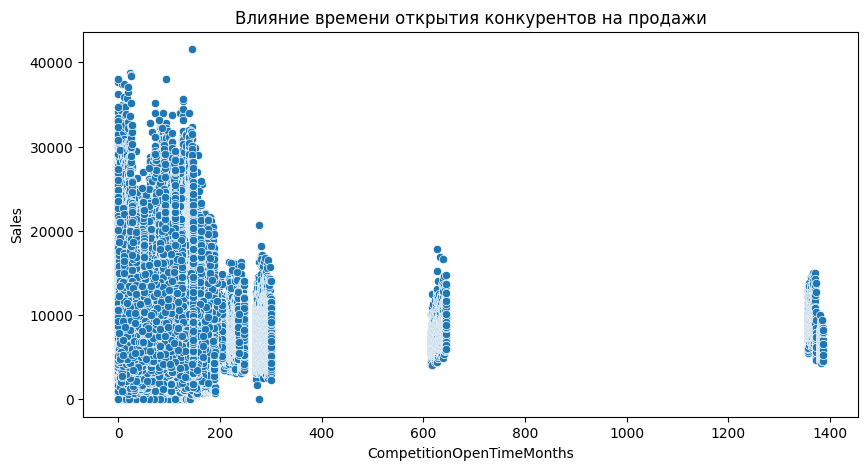

In [27]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='CompetitionOpenTimeMonths', y='Sales', data=df)
plt.title('Влияние времени открытия конкурентов на продажи')
plt.show()

In [28]:
df['Promo_Competition'] = df['Promo'] * (df['CompetitionDistance'] < df['CompetitionDistance'].median())

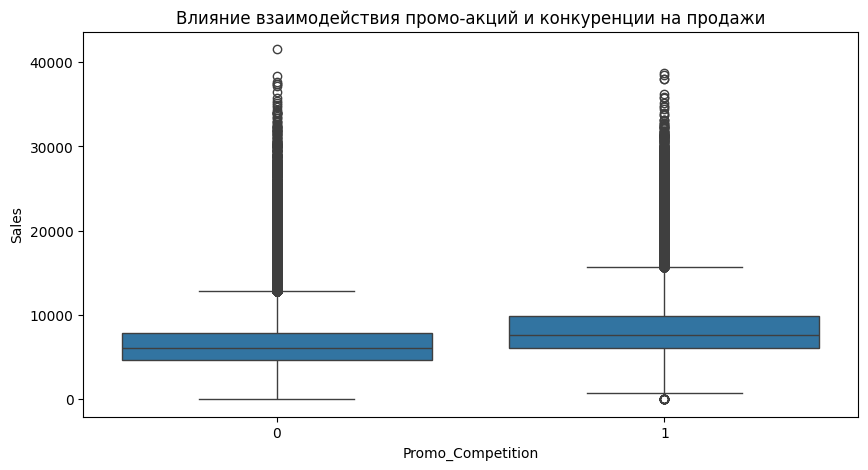

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Promo_Competition', y='Sales', data=df)
plt.title('Влияние взаимодействия промо-акций и конкуренции на продажи')
plt.show()